<a href="https://colab.research.google.com/github/sigvehaug/CAS-AML-M3/blob/main/IML_2_LRLR_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3, Deep Learning Research, CAS Advanced Machine Leaerning, 2021-10-04, S. Haug, University of Bern.

---

# 2 Interpretable Models

Models may be intrinsically interpretable, i.e. they have a structure and complexity which allows them to be explainable and understandable (for humans). Thus, interpretablity can be achieved by using a interpretable model. This chapter discusses much used interpretable models. 

### Some model characteristics

**Linearity:** A model f is linear if additivity $f(x + y) = f(x) + f(y)$ and homogeneity of degree 1 $f(\alpha x) = \alpha f(x)$ for all $\alpha$ where x and y are features, i.e. column variables.

**Monotonicity:** A model is monotone if it is entirely increasing or entierly non-increasing. 

**Interaction:** A model can account for interaction between features, i.e. it has terms where features are multiplied.  


**Table 2.1 :** Interpretable models with properties and area of application (Task).

<table width="100%" font-size="100%">
<thead>
<tr class="header">
<th align="left">Algorithm</th>
<th align="left">Linear</th>
<th align="left">Monotone</th>
<th align="left">Interaction</th>
<th align="left">Task</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">Linear regression</td>
<td align="left">Yes</td>
<td align="left">Yes</td>
<td align="left">No</td>
<td align="left">regr</td>
</tr>
<tr class="even">
<td align="left">Logistic regression</td>
<td align="left">No</td>
<td align="left">Yes</td>
<td align="left">No</td>
<td align="left">class</td>
</tr>
<tr class="odd">
<td align="left">Decision trees</td>
<td align="left">No</td>
<td align="left">Some</td>
<td align="left">Yes</td>
<td align="left">class,regr</td>
</tr>
<tr class="even">
<td align="left">k-nearest neighbors</td>
<td align="left">No</td>
<td align="left">No</td>
<td align="left">No</td>
<td align="left">class,regr</td>
</tr>
</tbody>
</table>'

### Our Section 2 Dataset

For teaching purposes we use some simple, cleaned and well-tested dataset.

In [ ]:
#Get the data and take a look
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
import pandas as pd
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.target)
df = pd.DataFrame(data['data'],columns=data['feature_names'])
round(df.head())

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
round(df.describe())

## 2.1 Linear Regression

In linear regression the model is a weighted sum:

$$ y = w_nx_n + ... + w_2x_2 + w_1x_1 + w_0$$

The interpration is that of a hyperplane in feature space.
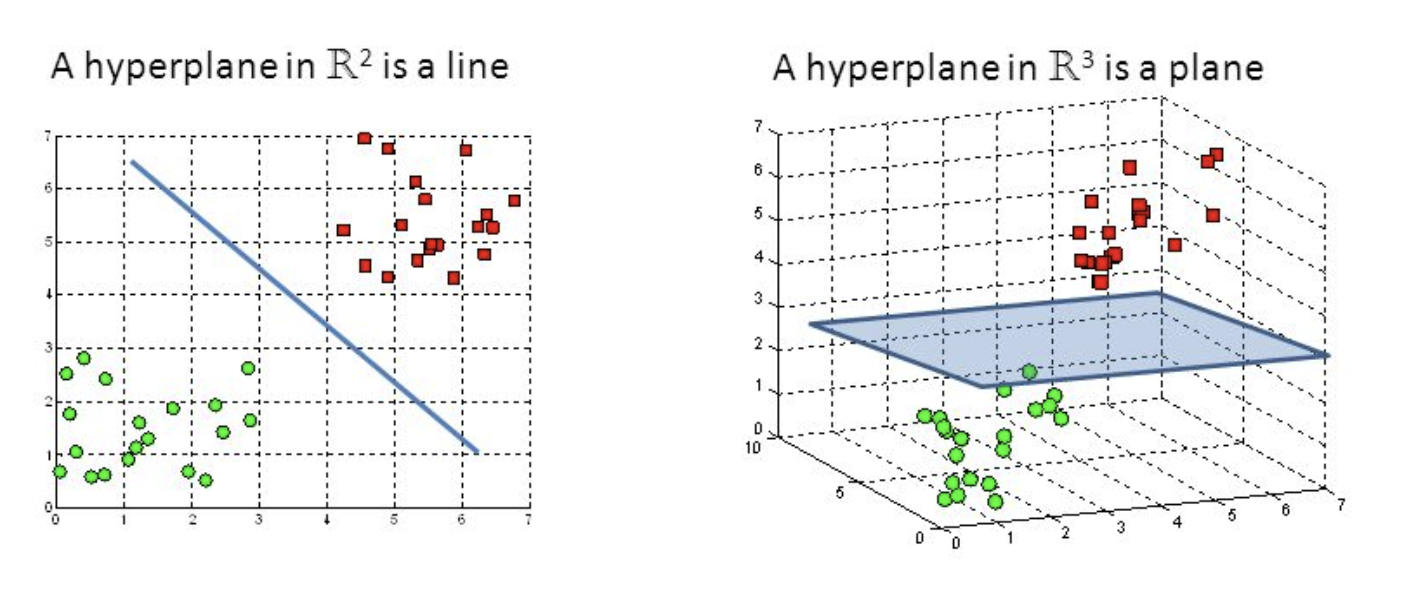
![hyperplane.png](attachment:hyperplane.png)

A hyperplane in $R^4$ is a space and so on. 



### Interpretation metrics for linear models

Interpretation of the weights in linear models, the weights are the gradients in that dimension:
- Numerical features: when the feature is increased by one unit, the output is increased by the weight of the feature
- Binary features are often represented by 0 and 1, i.e. 1 changes the outcome by the weight.
- Categorical features can be represented with one-hot encoding. The interpretation is then as for binary features.
- The intercept $w_0$ is the weight for the constant feature, which is just a gauge and mostly not relevant.

### General interpretation R-Squared
- Ranges from 0 to 1 and tells how well the model explains the variance in the target.
$$R^2 := 1 - \frac{SSE}{SST}= 1 - \frac{\sum_{i=1}(y_i - \hat y _i)^2}{\sum_{i=1}(y_i - \bar y_i)^2}$$


- Some times the adjusted $R-Squared$ is used $\bar{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1}$

### General interpretation t-Statistic
The feature importance can be estimated by the so-called t-statistic:

$$ t_{\hat{w}_i} := \frac{\hat{w}_i}{SE(\hat{w}_i)}$$

### Interpretation of a linear regression model

After training a linear regression model one would tabulate weights and t-statistic and then visualise  their importance and effect. This is an example from https://christophm.github.io/interpretable-ml-book/ with a bike rental dataset:

**Table**

<table>
<thead>
<tr class="header">
<th align="left"></th>
<th align="right">Weight</th>
<th align="right">SE</th>
<th align="right">|t|</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">(Intercept)</td>
<td align="right">2399.4</td>
<td align="right">238.3</td>
<td align="right">10.1</td>
</tr>
<tr class="even">
<td align="left">seasonSUMMER</td>
<td align="right">899.3</td>
<td align="right">122.3</td>
<td align="right">7.4</td>
</tr>
<tr class="odd">
<td align="left">seasonFALL</td>
<td align="right">138.2</td>
<td align="right">161.7</td>
<td align="right">0.9</td>
</tr>
<tr class="even">
<td align="left">seasonWINTER</td>
<td align="right">425.6</td>
<td align="right">110.8</td>
<td align="right">3.8</td>
</tr>
<tr class="odd">
<td align="left">holidayHOLIDAY</td>
<td align="right">-686.1</td>
<td align="right">203.3</td>
<td align="right">3.4</td>
</tr>
<tr class="even">
<td align="left">workingdayWORKING DAY</td>
<td align="right">124.9</td>
<td align="right">73.3</td>
<td align="right">1.7</td>
</tr>
<tr class="odd">
<td align="left">weathersitMISTY</td>
<td align="right">-379.4</td>
<td align="right">87.6</td>
<td align="right">4.3</td>
</tr>
<tr class="even">
<td align="left">weathersitRAIN/SNOW/STORM</td>
<td align="right">-1901.5</td>
<td align="right">223.6</td>
<td align="right">8.5</td>
</tr>
<tr class="odd">
<td align="left">temp</td>
<td align="right">110.7</td>
<td align="right">7.0</td>
<td align="right">15.7</td>
</tr>
<tr class="even">
<td align="left">hum</td>
<td align="right">-17.4</td>
<td align="right">3.2</td>
<td align="right">5.5</td>
</tr>
<tr class="odd">
<td align="left">windspeed</td>
<td align="right">-42.5</td>
<td align="right">6.9</td>
<td align="right">6.2</td>
</tr>
<tr class="even">
<td align="left">days_since_2011</td>
<td align="right">4.9</td>
<td align="right">0.2</td>
<td align="right">28.5</td>
</tr>
</tbody>
</table>


**Weight plot**
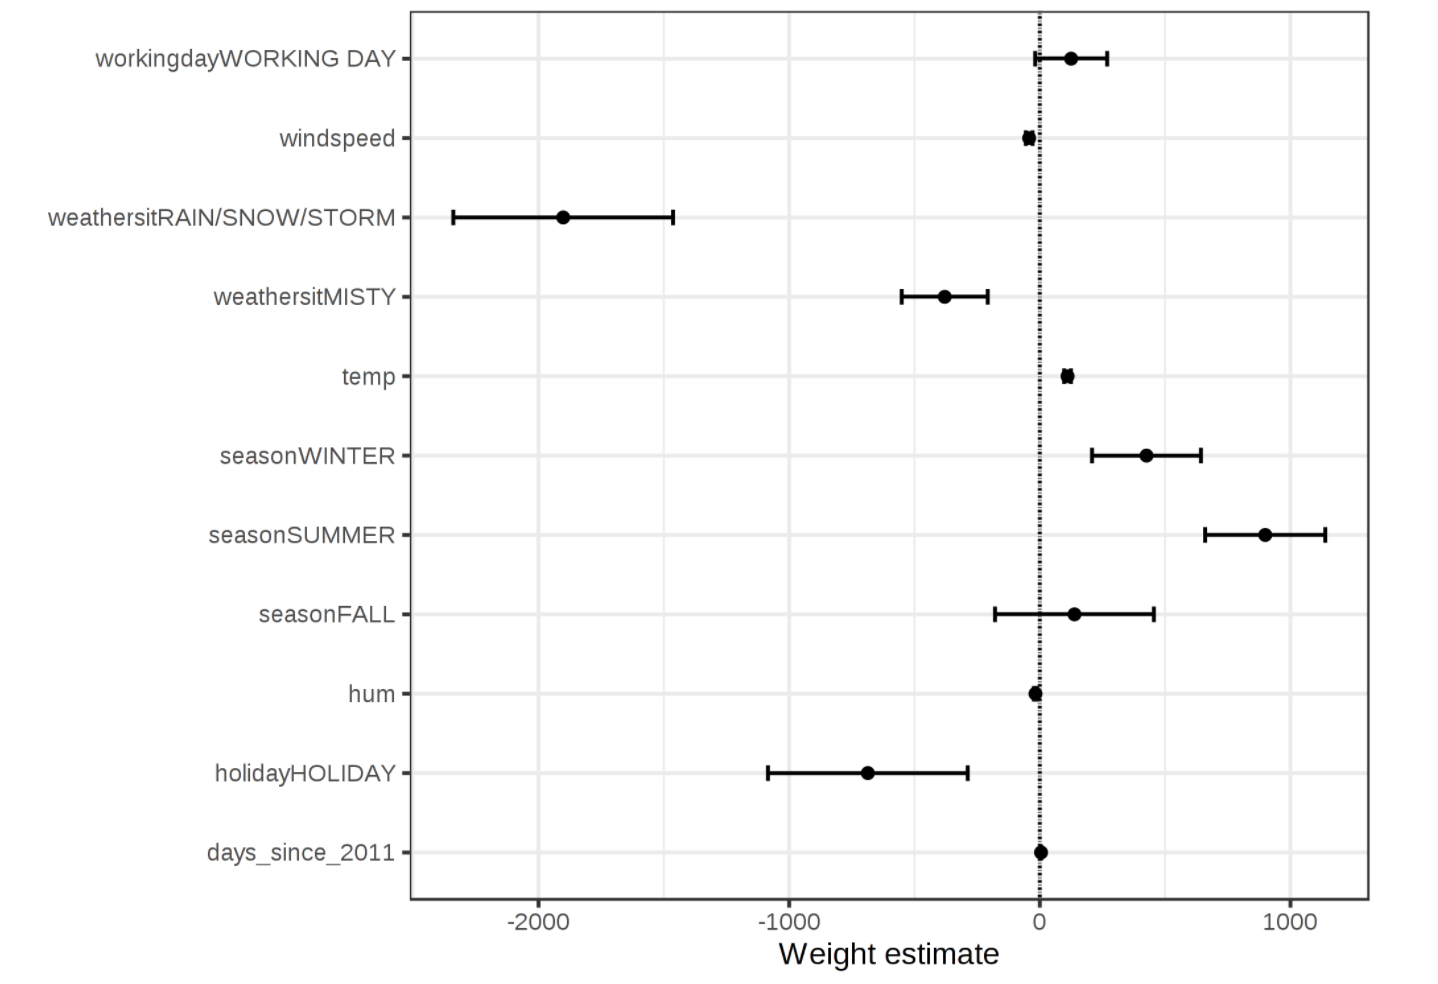


**Effect plot**

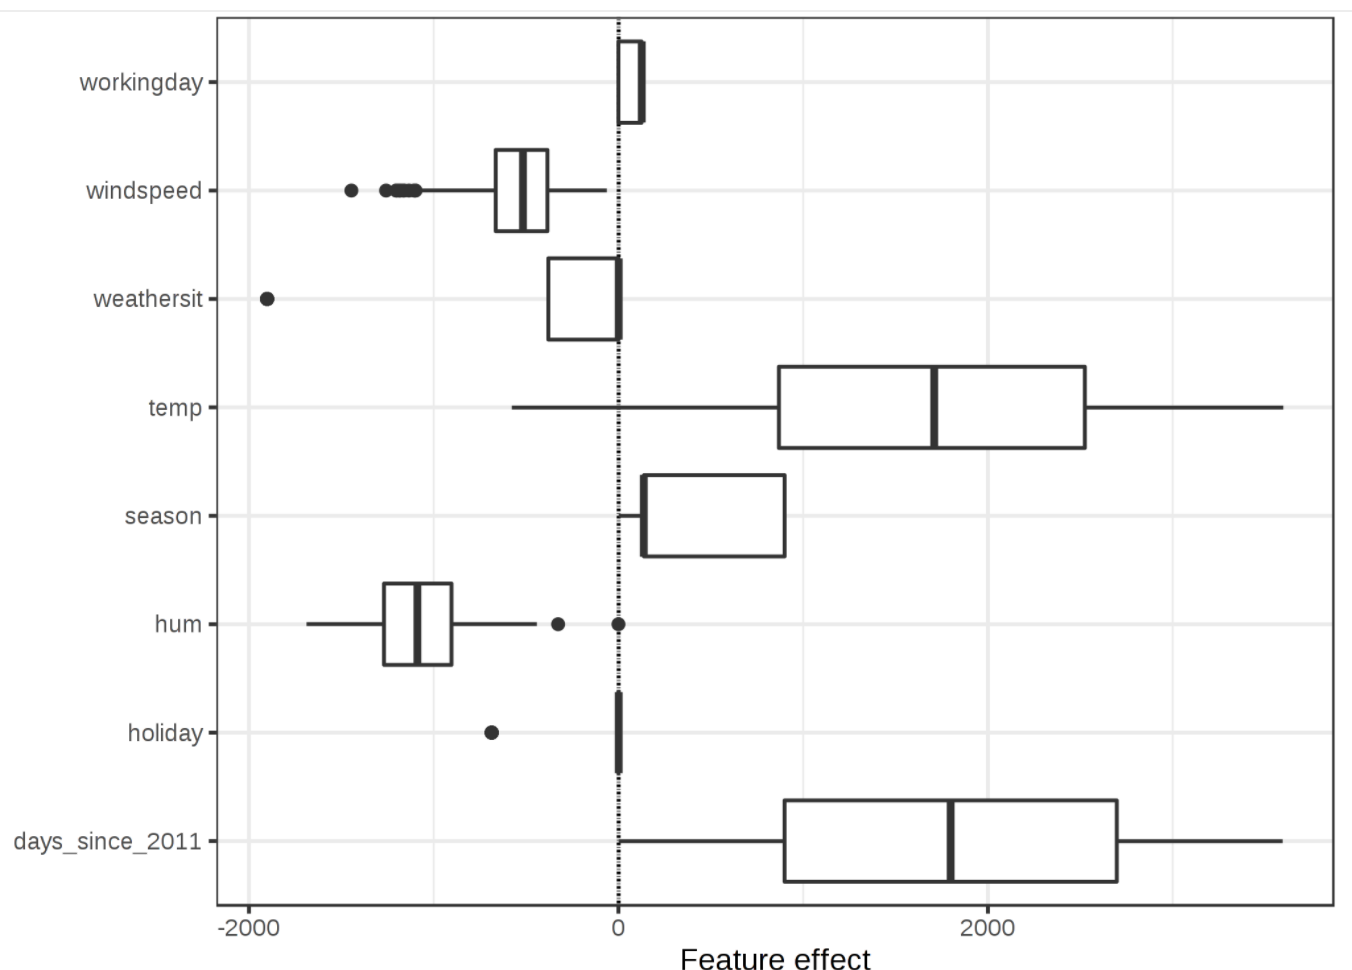

**Explaining individual features**
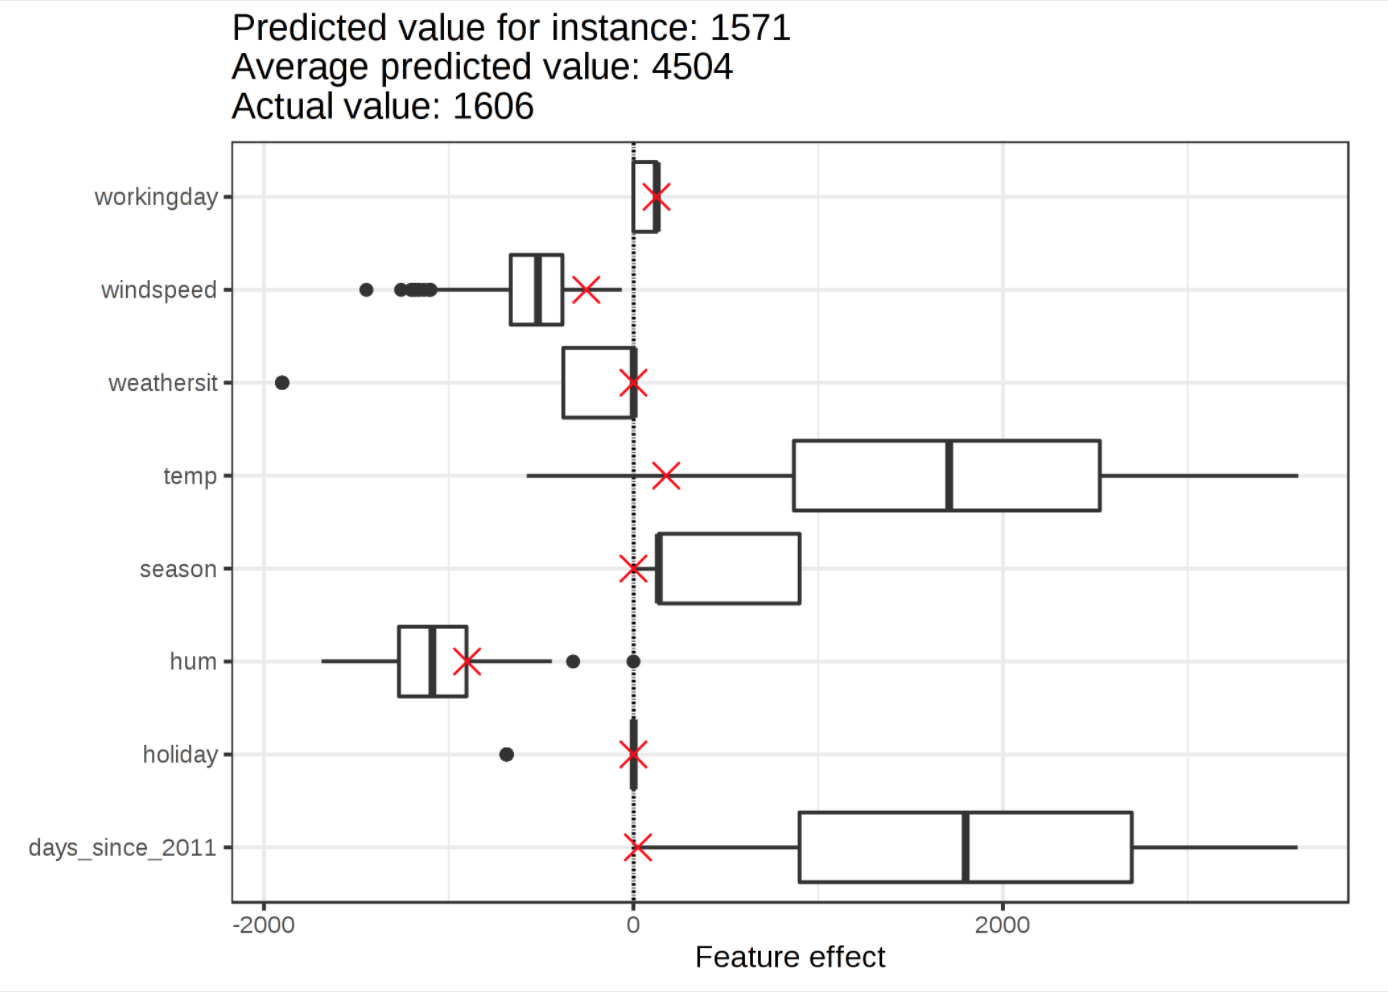

### Tutorial - Interpretation of a linear model 

- Train and test a linear model on the housing data with LinearRegression
- Make the interpretation table, weights and effect plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train) 

y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)


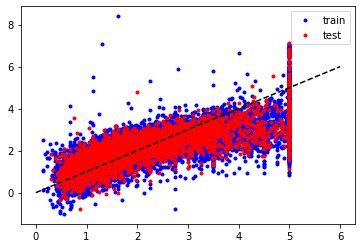

In [ ]:
plt.plot(y_train,y_p_train, '.b',label='train')
plt.plot(y_test,y_p_test, '.r',label='test')
plt.plot([0,6],[0,6],'--k')
plt.legend()

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y_train,x_train)
res = mod.fit()
idata = np.transpose([df.columns,res.params,res.bse,abs(res.tvalues),reg.coef_])
idf   = pd.DataFrame(idata,columns=['Feature','Weights_OLS','SE','¦t¦','W_LR'])
idf = idf.sort_values('Weights_OLS',ascending=False)
round(idf,1)

,Feature,Weights_OLS,SE,¦t¦,W_LR
3,AveBedrms,0.793142,0.0326552,24.2884,0.5749
0,MedInc,0.504265,0.00470602,107.153,0.427119
1,HouseAge,0.0156266,0.000521364,29.9725,0.00929301
4,Population,8.71719e-06,5.75034e-06,1.51594,-3.59885e-06
5,AveOccup,-0.00429202,0.000526325,8.1547,-0.00339821
7,Longitude,-0.0168586,0.00127917,13.1792,-0.437153
6,Latitude,-0.0647664,0.00403397,16.0552,-0.423956
2,AveRooms,-0.166797,0.00676314,24.6627,-0.0935065


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


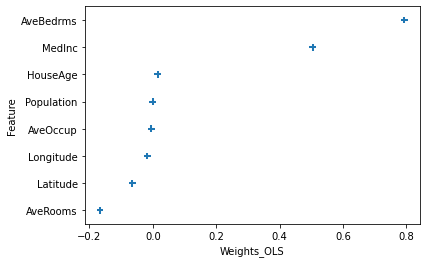

In [ ]:
import seaborn as sns
sns.pointplot(idf['Weights_OLS'],idf["Feature"], data=idf,markers='+',join=False)

## 2.2 Logistic Regression

The linear regression model predicts a real number, e.g. the house price. For classification tasks the goal is to assign a data point (row) to a category. For example male or female, represented by 0 or 1.

A model for classification is logisitic regression. It uses a logistic function, works better and has numbers between 0 and 1 as output that can be interpreted as a probability. 

Model form:

$$f(x) = \frac{1}{1+\exp(-x)} $$

The model looks like:


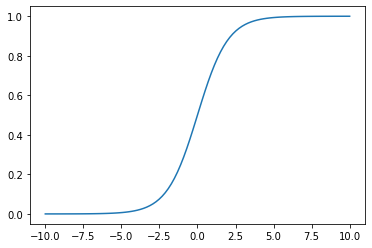

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x    = np.linspace(-10,10,100)
logx = 1./(1+np.exp(-x))
#logx
plt.plot(x,logx)

For multiple features the model becomes:

$$f(\vec{x}) = \frac{1}{1-\exp(w_nx_n + ... + w_2x_2 + w_1x_1 + w_0)} =: P(y=1)$$

So it is just a wrapper around the linear model.

**Treshhold:** Typically one would use $f(\vec{x}) = 0.5$ as threshold between two classes.  

The generalisation of the logistic model to cases with more than two classes, i.e. multinomial logistic regression, is the softmax function.


**Interpretation of the weights in logistical regression**

With some basic algebra we can show that the log of the odds is the linar sum of the weights:

$$\log(\frac{P(y=1)}{1-P(1=0)}) = ... = w_nx_n + ... + w_2x_2 + w_1x_1 + w_0$$

This is a bit hard to interprete, so one can further show that:

$$\frac{odds_{x_j + 1}}{odds_{x_j}} = \exp{w_j}$$

which is also not super intuitive. However, you may get used to it. 

### Interpretation of model weights in logistic regression

Interpretation of the weights in logistic models:

- Numerical features: when the feature i is increased by one unit, the estimated odds changes  by a factor $\exp(w_i)$.
- Binary features, often represented by 0 and 1, i.e. 1 changes the the estimated odds changes  by a factor $\exp(w_i)$.
- Categorical features can be represented with one-hot encoding. The interpretation is then as for binary features.
- The intercept: When all numerical features are zero and the categorical features are at the reference category, the estimated odds are $\exp(w_0)$. The interpretation of the intercept weight is usually not relevant.

**Example - logisitic model more predicting cervical cancer** 

In [ ]:
#import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv" 
dfc = pd.read_csv(url, na_values=('NaN', '?'), keep_default_na=False)
print(dfc.columns)
input = ['Smokes','Num of pregnancies','Hormonal Contraceptives','STDs (number)','IUD','Biopsy']
dfc_s = dfc[input].copy()   
dfc_s.dropna(axis=0, inplace=True)
#dfc_s[0:50]

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [ ]:
## Print a table with weights and odds table
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfc_s.iloc[:,0:5],
                                                    dfc_s['Biopsy'], test_size=0.05)
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
cols = list(dfc_s.columns[0:5])
cols.append('Intercept')
cofs = clf.coef_
cofs = np.append(cofs,clf.intercept_)
cofs
idata = np.transpose([cols,cofs])
idf = pd.DataFrame(idata,columns=['Feature','Weights'])
idf = idf.sort_values("Weights", ascending=True)
idf['Weights'] = idf['Weights'].astype('float').round(2)
idf['Odds Ratio'] = np.exp(idf['Weights']).round(2)
idf
#clf.coef_, clf.intercept_

,Feature,Weights,Odds Ratio
5,Intercept,-3.09,0.05
2,Hormonal Contraceptives,0.02,1.02
1,Num of pregnancies,0.10,1.11
0,Smokes,0.26,1.30
4,IUD,0.50,1.65
3,STDs (number),0.54,1.72


With sklearn we have to calculate SE etc manually via manually calculation of the variances. With statsmodules this is for free. There we can fit the logit model, the logarithmic of the odds, which is the inverse logistic function.

In [ ]:
#import statsmodels.api as sm
x_train['Intercept']=1.0
logit_mod = sm.Logit(y_train, x_train)
logit_res = logit_mod.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.246792
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Biopsy   No. Observations:                  650
Model:                          Logit   Df Residuals:                      644
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                 0.03455
Time:                        13:17:45   Log-Likelihood:                -160.41
converged:                       True   LL-Null:                       -166.16
Covariance Type:            nonrobust   LLR p-value:                   0.04261
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Smokes                      0.3009      0.402      0.748      0.455      -0.488       1.090
Num of pregnancies          0.0983      0.101      0.969      0.333      -0.101       0.297
Hormonal Contraceptives     0.0232      0.327      0.071      0.944      -0.619       0.665
STDs (number)               0.5515      0.195      2.827      0.005       0.169       0.934
IUD                         0.5892      0.415      1.422      0.155      -0.223       1.402
Intercept                  -3.1072      0.365     -8.515      0.000      -3.822      -2.392
===========================================================================================
"""

### Summary

- Linear models are easy to interprete
  - We print feature weigths, standard errors and t-statistics
  - We plot weights and impacts
- Logistic regression is a bit harder to interprete (odds)
  - We print and plot as for linear models, maybe also the odds

### Next Notebook